In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

In [3]:
print("Feature names:", housing.feature_names)
print("Dataset shape:", X.shape)
print("Target shape:", y.shape)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Dataset shape: (20640, 8)
Target shape: (20640,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
numeric_features = X.columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

In [7]:
elastic_net = ElasticNet(random_state=0)

In [8]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', elastic_net)])

In [9]:
param_grid = {
    'regressor__alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
    'regressor__l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
}

In [10]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object'))])),
                                       ('regressor',
                                        ElasticNet(random_state=0))]),
             param_grid={'regressor__alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
                         'regressor__l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [11]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.1}


In [12]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.59
R² Score: 0.55


In [14]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted Values')

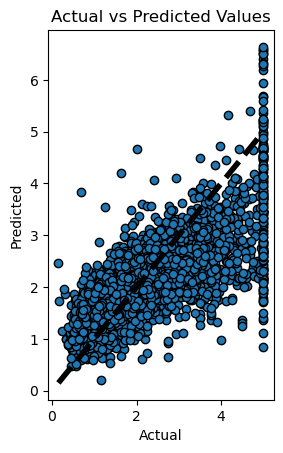

In [15]:
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')

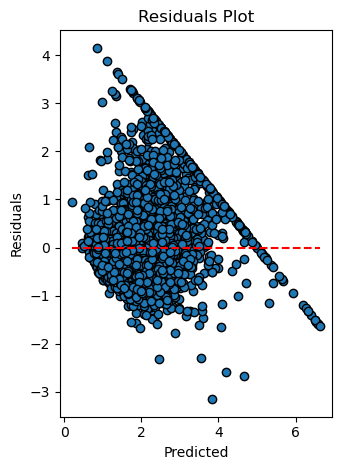

In [16]:
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, edgecolors=(0, 0, 0))
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.tight_layout()
plt.show()

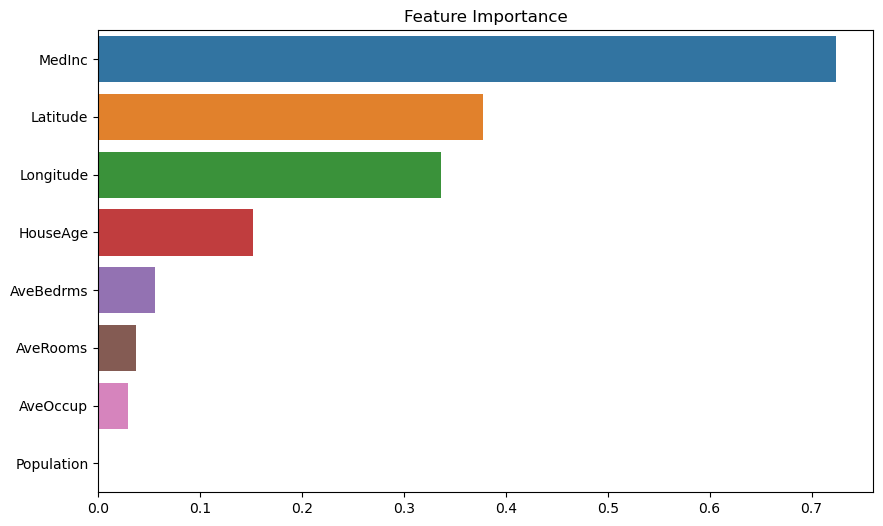

In [17]:
feature_importance = np.abs(best_model.named_steps['regressor'].coef_)
sorted_idx = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=np.array(numeric_features)[sorted_idx])
plt.title('Feature Importance')
plt.show()